<a href="https://colab.research.google.com/github/HananAlfares/Enhanced-Intrusion-Detection-for-IoT/blob/main/BoT_IoT_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive/")
# Set working directory (consider running this again after mounting)
cwd = "/content/drive/My Drive/Intrusion analysis and incident management/Bot_IoT"
os.chdir(cwd)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Bot_IoT_combined.csv',low_memory=False)


In [ ]:
data.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal


In [ ]:
# Get the number of records (rows) in the DataFrame
record_count = len(data)
print("Record count:", record_count)

Record count: 5000000


In [ ]:
print(data['attack'].value_counts())

attack
1    4992785
0       7215
Name: count, dtype: int64


In [ ]:
print(data['category'].value_counts())

category
DoS               3169559
Reconnaissance    1821639
Normal               7215
Theft                1587
Name: count, dtype: int64


In [ ]:
print(data['subcategory '].value_counts())

subcategory 
TCP                  3139853
Service_Scan         1463364
OS_Fingerprint        358275
HTTP                   29706
Normal                  7215
Keylogging              1469
Data_Exfiltration        118
Name: count, dtype: int64


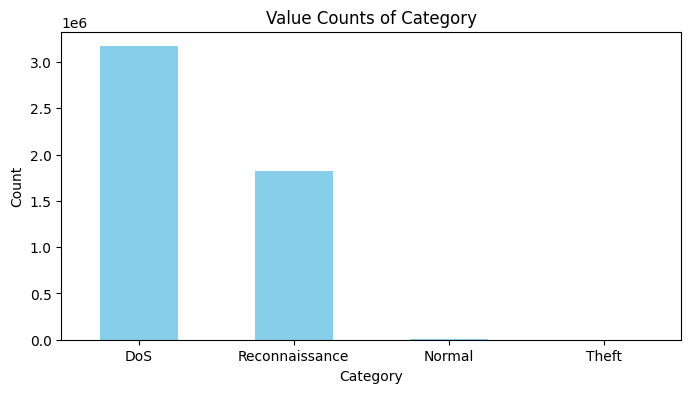

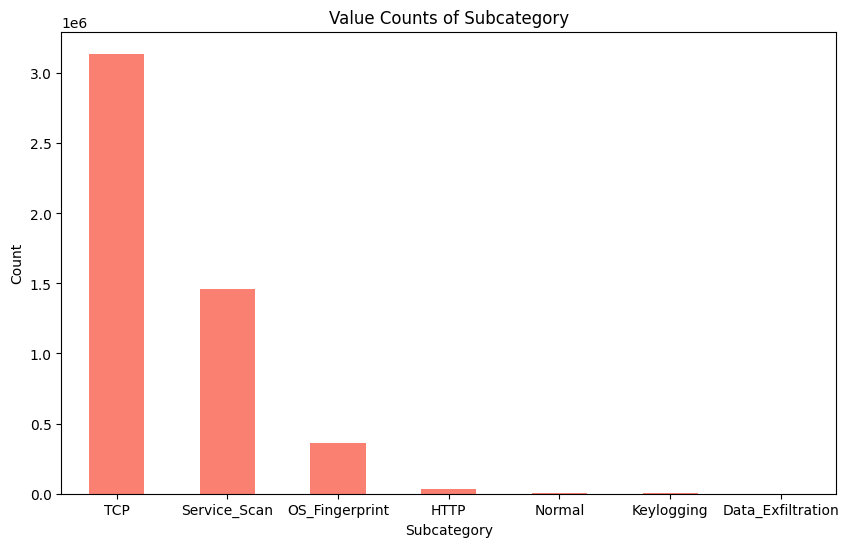

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot value counts for 'category'
plt.figure(figsize=(8, 4))
data['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plot value counts for 'subcategory'
plt.figure(figsize=(10, 6))
data['subcategory '].value_counts().plot(kind='bar', color='salmon')
plt.title('Value Counts of Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()




In [ ]:
#check the missng values
data.isna().sum().sum()

30001946

In [ ]:

# Function to replace both null and string values with zeros
data.fillna(0)


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,0,192.168.100.3,0,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,0,192.168.100.7,0,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,4999996,1.528082e+09,e g,tcp,192.168.100.150,52513.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.181411,0.108846,0.036442,1,DoS,TCP
4999996,4999997,1.528082e+09,e g,tcp,192.168.100.150,52516.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.181411,0.108846,0.036442,1,DoS,TCP
4999997,4999998,1.528082e+09,e g,tcp,192.168.100.150,52517.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.181411,0.108846,0.036442,1,DoS,TCP
4999998,4999999,1.528082e+09,e g,tcp,192.168.100.150,52522.0,192.168.100.3,80.0,6,548,...,4,2,428,120,0.181411,0.108846,0.036442,1,DoS,TCP


In [ ]:
#check categorical data
for column in data.columns:
    data_type = data[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Column 'pkSeqID' has data type: int64
Column 'stime' has data type: float64
Column 'flgs' has data type: object
Column 'proto' has data type: object
Column 'saddr' has data type: object
Column 'sport' has data type: object
Column 'daddr' has data type: object
Column 'dport' has data type: object
Column 'pkts' has data type: int64
Column 'bytes' has data type: int64
Column 'state' has data type: object
Column 'ltime' has data type: float64
Column 'seq' has data type: int64
Column 'dur' has data type: float64
Column 'mean' has data type: float64
Column 'stddev' has data type: float64
Column 'smac' has data type: float64
Column 'dmac' has data type: float64
Column 'sum' has data type: float64
Column 'min' has data type: float64
Column 'max' has data type: float64
Column 'soui' has data type: float64
Column 'doui' has data type: float64
Column 'sco' has data type: float64
Column 'dco' has data type: float64
Column 'spkts' has data type: int64
Column 'dpkts' has data type: int64
Column 'sby

In [ ]:
mixed_type_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        mixed_type_columns.append(column)

print("Columns with mixed data types:", mixed_type_columns)


Columns with mixed data types: ['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category', 'subcategory ']


In [ ]:
#flgs, proto, state, category, subcategory: contains categorical data >> convert using label encoder

In [ ]:
#saddr, daddr: These columns appear to contain IP addresses.
# If you need to extract information from these IP addresses (e.g., network range, country),
#you can use libraries like ipaddress in Python.

In [ ]:
#sport, dport: These columns likely represent port numbers. Here's how you can handle them:
#Convert to Numeric: If the data contains only numeric values, you can directly convert them to integers.
#Bucketing: If there are too many unique port numbers, you might want to bucket them into ranges.

In [ ]:
#convert categorical data using Label encoder
from sklearn.preprocessing import LabelEncoder
# Columns to be label encoded
label_encode_columns = ['flgs', 'proto', 'state']


In [ ]:
# Label encoding
label_encoders = {}
for col in label_encode_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


In [ ]:

# Handling mixed data types (Example: IP addresses)
# Here we'll just hash the IP addresses for simplicity
data['saddr'] = data['saddr'].apply(hash)
data['daddr'] = data['daddr'].apply(hash)

In [ ]:
#perfrom onehot encoder on the columns of y

In [ ]:
# Step 1: Combine the two columns
data['combined'] = data['category'] + '_' + data['subcategory ']

In [ ]:
# Step 2: Apply One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data= encoder.fit_transform(data[['combined']])


In [ ]:
# Step 3: Split back into separate columns


encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['combined']))



In [ ]:
# Save the categories for future use
categories = encoder.categories_

In [ ]:
print (categories)

[array(['DoS_HTTP', 'DoS_TCP', 'Normal_Normal',
       'Reconnaissance_OS_Fingerprint', 'Reconnaissance_Service_Scan',
       'Theft_Data_Exfiltration', 'Theft_Keylogging'], dtype=object)]


In [ ]:

# Drop original 'category' and 'subcategory' columns
data.drop(['category', 'subcategory '], axis=1, inplace=True)

In [ ]:
# Concatenate the encoded DataFrame with the original DataFrame
#data = pd.concat([data, encoded_df], axis=1)
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)


In [ ]:
print(data.dtypes)

pkSeqID                                     int64
stime                                     float64
flgs                                        int64
proto                                       int64
saddr                                       int64
sport                                      object
daddr                                       int64
dport                                      object
pkts                                        int64
bytes                                       int64
state                                       int64
ltime                                     float64
seq                                         int64
dur                                       float64
mean                                      float64
stddev                                    float64
smac                                      float64
dmac                                      float64
sum                                       float64
min                                       float64


In [ ]:
# Drop the combined column
data.drop('combined', axis=1, inplace=True)


In [ ]:
#Category Column:
#One-hot encoding for the 'category' column will create four binary columns, one for each category: 'DoS', 'Reconnaissance', 'Normal', and 'Theft'.
#Each sample will have a value of 1 in the corresponding category column and 0 in all other category columns.
#Subcategory Column:
#One-hot encoding for the 'subcategory' column will create binary columns for each unique subcategory.
#If you have a large number of subcategories, one-hot encoding will create a larger number of binary columns, each representing a unique subcategory.
#Similar to the 'category' column, each sample will have a value of 1 in the column corresponding to its subcategory and 0 in all other subcategory columns.

In [ ]:
#check the data type after handling the mix data type

In [ ]:
mixed_type_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        mixed_type_columns.append(column)

print("Columns with mixed data types:", mixed_type_columns)


Columns with mixed data types: ['sport', 'dport']


In [ ]:
# Convert 'sport' and 'dport' to numeric, handling errors
data['sport'] = pd.to_numeric(data['sport'], errors='coerce')
data['dport'] = pd.to_numeric(data['dport'], errors='coerce')


In [ ]:

# Function to replace both null and string values with zeros
data.fillna(0)


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,srate,drate,attack,combined_DoS_HTTP,combined_DoS_TCP,combined_Normal_Normal,combined_Reconnaissance_OS_Fingerprint,combined_Reconnaissance_Service_Scan,combined_Theft_Data_Exfiltration,combined_Theft_Keylogging
0,1,1.526344e+09,0,0,-166206785349193489,0.0,6642015214120314534,0.0,4,240,...,0.000836,0.000836,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1.526344e+09,0,5,-7064797909674988218,139.0,-7768871489813428262,36390.0,10,680,...,0.002751,0.002751,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1.526344e+09,0,6,4166359742754866691,51838.0,3287310917052991502,123.0,2,180,...,0.000000,0.000000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.526344e+09,0,0,-7768871489813428262,0.0,-7064797909674988218,0.0,10,510,...,0.002751,0.002751,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,1.526344e+09,0,6,-3703756779318334635,58999.0,-166206785349193489,53.0,4,630,...,0.001755,0.001755,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,4999996,1.528082e+09,9,5,-2819175364344283913,52513.0,6642015214120314534,80.0,6,548,...,0.108846,0.036442,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4999996,4999997,1.528082e+09,9,5,-2819175364344283913,52516.0,6642015214120314534,80.0,6,548,...,0.108846,0.036442,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4999997,4999998,1.528082e+09,9,5,-2819175364344283913,52517.0,6642015214120314534,80.0,6,548,...,0.108846,0.036442,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4999998,4999999,1.528082e+09,9,5,-2819175364344283913,52522.0,6642015214120314534,80.0,6,548,...,0.108846,0.036442,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mixed_type_columns = []

for column in data.columns:
    if data[column].dtype == 'object':
        mixed_type_columns.append(column)

print("Columns with mixed data types:", mixed_type_columns)


Columns with mixed data types: []


In [ ]:

# Create a mapping between labels and their one-hot encoded values
label_mapping = {label: encoded_vector for label, encoded_vector in zip(categories[0], np.identity(len(categories[0])))}
print("\nLabel to One-Hot Encoding Mapping:")
for label, one_hot in label_mapping.items():
    print(f"{label}: {one_hot}")



Label to One-Hot Encoding Mapping:
DoS_HTTP: [1. 0. 0. 0. 0. 0. 0.]
DoS_TCP: [0. 1. 0. 0. 0. 0. 0.]
Normal_Normal: [0. 0. 1. 0. 0. 0. 0.]
Reconnaissance_OS_Fingerprint: [0. 0. 0. 1. 0. 0. 0.]
Reconnaissance_Service_Scan: [0. 0. 0. 0. 1. 0. 0.]
Theft_Data_Exfiltration: [0. 0. 0. 0. 0. 1. 0.]
Theft_Keylogging: [0. 0. 0. 0. 0. 0. 1.]


In [ ]:

# Create a mapping between labels and their one-hot encoded values
label_mapping = {label: encoded_vector for label, encoded_vector in zip(subcategories[0], np.identity(len(subcategories[0])))}
print("\nLabel to One-Hot Encoding Mapping:")
for label, one_hot in label_mapping.items():
    print(f"{label}: {one_hot}")


In [ ]:
# to convert dataframe to csv file which we will use in our classification
data.to_csv('Bot_IoT_preprocessed.csv', index=False)